In [ ]:
"""
Purpose: To figure out why 
"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload


INFO - 2021-05-26 00:23:00,720 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-26 00:23:00,723 - settings - Setting database.user to celiib
INFO - 2021-05-26 00:23:00,724 - settings - Setting database.password to newceliipass
INFO - 2021-05-26 00:23:00,728 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-05-26 00:23:00,729 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-26 00:23:00,745 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-05-26 00:23:01,242 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-26 00:23:01,246 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-26 00:23:01,247 - settings - Setting database.user to celiib
INFO - 2021-05-26 00:23:01,248 - settings - Setting database.password to newceliipass
INFO - 2021-05-26 00:23:01,249 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-26 00:23:01,249 - settings - Setting database.user to celiib
INFO - 2021-05-26 00:23:01,250 - settings - Setting database.password to newceliipass
INFO - 2021-05-26 00:23:01,253 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-26 00:23:01,776 - settings - Setting enable_python_native_blobs to True


In [3]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-05-26 00:23:03,605 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-26 00:23:03,607 - settings - Setting database.user to celiib
INFO - 2021-05-26 00:23:03,608 - settings - Setting database.password to newceliipass
INFO - 2021-05-26 00:23:03,612 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-26 00:23:04,188 - settings - Setting enable_python_native_blobs to True


# Finding the Jobs that Errored

In [4]:
curr_table = (minnie.schema.jobs & "table_name='__auto_proofread_validation_score4'")
(curr_table)#.delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__auto_proofread_validation_score4,1b3092a5085d29d975a3d278ccb49349,error,=BLOB=,KeyError: 'synapse_id',=BLOB=,celiib@10.28.0.171,at-node44,1,458408,2021-05-25 14:42:01
__auto_proofread_validation_score4,2c18a09d3faf8e9ea3634dc3a0f173b6,error,=BLOB=,Exception: min_dist (54910.81763562633) larger than nuclei_distance_threshold (15000),=BLOB=,celiib@10.28.0.158,at-node31,1,458384,2021-05-25 14:27:12
__auto_proofread_validation_score4,40a99bace81e99ae6d791efba1a4c8a1,error,=BLOB=,KeyError: 'synapse_id',=BLOB=,celiib@10.28.0.83,at-compute004,178484,458517,2021-05-25 14:54:03
__auto_proofread_validation_score4,5db4edd72a93f64d8324510579dd4d3f,error,=BLOB=,KeyError: 'synapse_id',=BLOB=,celiib@10.28.0.145,at-node18,1,458415,2021-05-25 14:34:31
__auto_proofread_validation_score4,68b7ec4205a75f6cbadd2757f884f451,error,=BLOB=,KeyError: 'synapse_id',=BLOB=,celiib@10.28.0.161,at-node34,1,458383,2021-05-25 14:38:32
__auto_proofread_validation_score4,82f80606a7e35ce86abe6e15c9433611,error,=BLOB=,KeyError: 'synapse_id',=BLOB=,celiib@10.28.0.153,at-node26,1,458423,2021-05-25 14:35:59
__auto_proofread_validation_score4,8b75e7e31cc1bff3885d635992976843,error,=BLOB=,KeyError: 'synapse_id',=BLOB=,celiib@10.28.0.133,at-node6,1,458414,2021-05-25 14:38:46
__auto_proofread_validation_score4,9e77fcc57380988689907f4df10f18e4,error,=BLOB=,"TypeError: list indices must be integers or slices, not tuple",=BLOB=,celiib@10.28.0.175,at-node48,1,458377,2021-05-25 14:38:57
__auto_proofread_validation_score4,bb32b23823ba2c90209be561a4f5f6a5,error,=BLOB=,Exception: min_dist (41289.702023132195) larger than nuclei_distance_threshold (15000),=BLOB=,celiib@10.28.0.148,at-node21,1,458375,2021-05-25 14:34:50
__auto_proofread_validation_score4,d9c0c0615c5ac25b3402b5268c1a3443,error,=BLOB=,KeyError: 'synapse_id',=BLOB=,celiib@10.28.0.156,at-node29,1,458405,2021-05-25 14:35:38


In [99]:
neuron_obj_s.segment_id

864691136664412413

In [103]:
vu.new_to_old_segment_id(864691135367284729)

864691136664412413

In [112]:
errored_segs = [k["segment_id"] for k in du.restrict_jobs_table_by_error_substring(curr_table,"Exception").fetch("key")]
errored_segs

Found 2 matching entries with substring Exception


[864691135367284729, 864691135415710906]

In [ ]:
[864691136227020113 864691135367284729, 864691135415710906]

In [13]:
(minnie.AutoProofreadValidationSegmentMap4() 
    & dict(segment_id=864691136388458871))

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,582471,864691136388458871,0.08,864691136811795059,True,True,partial,1,0,0,0,


In [22]:
minnie.AutoProofreadValidationSegmentMap4() & "old_segment_id = 864691135961392330"

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,518004,864691135873703054,0.08,864691135961392330,True,True,partial,1,0,0,0,


In [23]:
vu.old_segment_id_validation_synapses(segment_id =864691135961392330,
    verbose = True,
    plot_original_mesh = False,
    plot_potential_synapses = False,
    plot_matched_synapses = False)

# of end nodes = 16
last_datetime_edited = 2021-01-20 21:53:09.943000
# of presyn = 99, # of postsyn = 4306
Total synapses BEFORE filtering = 4405
Total synapses AFTER filtering = 4385
4302 out of 4385 were within threshold of original mesh


/meshAfterParty/meshAfterParty/validation_utils.py:2470: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syn_match["synapse_x"] = np.array(list(syn_match["ctr_pt_position"].to_numpy()))[:,0]
/meshAfterParty/meshAfterParty/validation_utils.py:2471: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syn_match["synapse_y"] = np.array(list(syn_match["ctr_pt_position"].to_numpy()))[:,1]
/meshAfterParty/meshAfterParty/validation_utils.py:2472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

# Debugging the creation of the synapses

In [106]:
import validation_utils as vu
for new_seg in errored_segs:
    print(f"\n\n----Working on {new_seg}----")
    if new_seg in [864691136573079970,
 864691136105661657,
 864691135117980637,
 864691136388458871,
                  864691135975633475,
                  864691135272206865,
 864691135915343462,
 864691135440543560,]:
        continue
    
    vu.old_segment_id_validation_synapses(segment_id = vu.new_to_old_segment_id(new_seg),
    verbose = True,
    plot_original_mesh = False,
    plot_potential_synapses = False,
    plot_matched_synapses = False)



----Working on 864691136227020113----
# of end nodes = 38
last_datetime_edited = 2020-09-03 14:35:51.939000
# of presyn = 1185, # of postsyn = 2775
Total synapses BEFORE filtering = 3960
Total synapses AFTER filtering = 3918
2736 out of 3918 were within threshold of original mesh


In [27]:
segs = [864691135975633475,864691135440543560]
criteria = "lineage graph wouldn't load to populate synapses"

minnie.AutoProofreadValidationSegmentExclude4.insert([dict(segment_id=vu.new_to_old_segment_id(s),
                                                          criteria=criteria) for s in segs],skip_duplicates=True)

In [ ]:
"""
Solution: Some of the Segments just were

"""

# Debugging the Nuclei Not being close enough

In [28]:
curr_table = (minnie.schema.jobs & "table_name='__auto_proofread_validation_score4'")
curr_table

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__auto_proofread_validation_score4,2c18a09d3faf8e9ea3634dc3a0f173b6,error,=BLOB=,Exception: min_dist (54910.81763562633) larger than nuclei_distance_threshold (15000),=BLOB=,celiib@10.28.0.158,at-node31,1,458384,2021-05-25 14:27:12
__auto_proofread_validation_score4,40a99bace81e99ae6d791efba1a4c8a1,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,180765,459218,2021-05-25 19:59:10
__auto_proofread_validation_score4,68b7ec4205a75f6cbadd2757f884f451,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,180448,459216,2021-05-25 19:58:22
__auto_proofread_validation_score4,9e77fcc57380988689907f4df10f18e4,error,=BLOB=,"TypeError: list indices must be integers or slices, not tuple",=BLOB=,celiib@10.28.0.175,at-node48,1,458377,2021-05-25 14:38:57
__auto_proofread_validation_score4,bb32b23823ba2c90209be561a4f5f6a5,error,=BLOB=,Exception: min_dist (41289.702023132195) larger than nuclei_distance_threshold (15000),=BLOB=,celiib@10.28.0.148,at-node21,1,458375,2021-05-25 14:34:50
__auto_proofread_validation_score4,f246a78901778662a72ef6b62e6b8f61,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,181017,459219,2021-05-25 19:59:28


In [33]:
(curr_table & "key_hash='9e77fcc57380988689907f4df10f18e4'").fetch1("key")

{'ver': Decimal('88.00'),
 'nucleus_id': 533187,
 'segment_id': 864691136227020113,
 'old_ver': Decimal('0.08')}

In [34]:
vu.new_to_old_segment_id(864691135367284729)

864691136664412413

In [37]:
decomp_paths = (minnie.DecompositionSplit() & dict(segment_id=864691136664412413)).fetch("decomposition")
split_

array([PosixPath('/mnt/dj-stor01/platinum/minnie65/02/decomposition/864691136664412413_0_25_soma_0_split.pbz2'),
       PosixPath('/mnt/dj-stor01/platinum/minnie65/02/decomposition/864691136664412413_0_25_soma_1_split.pbz2')],
      dtype=object)

In [38]:
neuron_obj = du.filepath_to_neuron_obj(decomp_paths[0])

Decompressing Neuron in minimal output mode...please wait


In [39]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Testing why the DecompositionAxon Had Faces not saved correctly

In [46]:
#1) Pull Down all the Neuron Objects associated with a segment_id
segment_id = 864691136664412413
verbose = True
import time
import axon_utils as au

neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id,
                                                                         ignore_DecompositionAxon=True)

if verbose:
    print(f"Number of Neurons found ={len(neuron_objs)}")

#For each neuron:
dict_to_write = []
n_obj_to_save = []
for split_index,neuron_obj in zip(neuron_split_idxs,neuron_objs):

    if verbose:
        print(f"--> Working on Split Index {split_index} -----")

    st = time.time()
    #Run the Axon Decomposition
    neuron_obj_with_web = au.complete_axon_processing(neuron_obj,
                             verbose=True)
    
    n_obj_to_save.append(neuron_obj_with_web)

#     save_time = time.time()
#     ret_file_path = neuron_obj_with_web.save_compressed_neuron(
#                                     output_folder=str(du.get_decomposition_path()),
#                                     #output_folder = "./",
#     file_name=f"{neuron_obj_with_web.segment_id}_{split_index}_split_axon_v{au.axon_version}",
#                                       return_file_path=True,
#                                      export_mesh=False,
#                                      suppress_output=True)

**Using table __decomposition_split for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
**Using table __decomposition_split for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 2
Number of Neurons found =2
--> Working on Split Index 0 -----

Part 1: Axon like branchese 
{'L0': array([ 9, 12, 38, 42]), 'L1': array([ 4, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36]), 'L2': array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), 'L4': array([11])}
Limb L0 soma angle: 33.22 
Limb L1 soma angle: 123.47 
Limb L2 soma angle: 143.58 
Limb L3 soma angle: 96.14 
Limb L4 soma angle: 92.06 
Limb L5 soma angle: 81.68 
Limb L6 soma angle: 164.01 

Part 2: possible_axon_limbs = [1, 2, 3, 4, 5, 6]

Phase 2:

  0%|          | 0/1 [00:00<?, ?it/s]

More than 1 seperated mesh (taking the top one): [<trimesh.Trimesh(vertices.shape=(46066, 3), faces.shape=(91864, 3))>
 <trimesh.Trimesh(vertices.shape=(394, 3), faces.shape=(768, 3))>]
root_curr = [1393364.   505701.   823141.3]
Time for preparing soma vertices and root: 0.00040841102600097656
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.4729013442993164
branches_touching_root = [8, 26, 51]
combining close nodes
combine_threshold = 1300
length of Graph = 12873
After combining close endpoints max(kept_branches_idx) = 76, len(kept_branches_idx) = 73
empty_indices % = 0.0
 conflict_indices % = 0.01939333122457216
AFTER face_lookup_resolved_test
Decomposing first pass: 5.5828070640563965
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.9788742065429688e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.0001990795135498047
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.004800558090209961
sbv[0].reshape(-1,3) = [[1393364.   505701.   823141.3]]
closest_sk_pt_coord BEFORE = [1393346.715836

In [49]:
neuron_obj = n_obj_to_save[0]
neuron_obj

In [50]:
neuron_obj.save_compressed_neuron("./",
                                 export_mesh=True)

Saving Neuorn in suppress_output mode...please wait
Saved File at location: 864691136664412413_0_25_soma_0_split_axon_v5


In [54]:
nviz.plot_objects(neuron_objs[0].mesh,
                 meshes=[neuron_objs[1].mesh],
                 meshes_colors="red")

In [51]:
nviz.plot_objects(neuron_obj.mesh)

In [61]:
recovered_mesh = curr_mesh.submesh([neuron_obj.original_mesh_idx],append=True)
nviz.plot_objects(recovered_mesh)

In [58]:
curr_mesh = du.fetch_segment_id_mesh(864691136664412413)
nviz.plot_objects(curr_mesh)

In [56]:
import neuron_utils as nru
recov_neuron_obj = nru.decompress_neuron("864691136664412413_0_25_soma_0_split_axon_v5",
                     original_mesh=du.fetch_segment_id_mesh(864691136664412413))

Decompressing Neuron in minimal output mode...please wait


In [57]:
nviz.visualize_neuron(recov_neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh


In [63]:
decomp_path = (minnie.AutoProofreadValidationScore4() & dict(segment_id=864691135855890478)).fetch1("decomposition")
decomp_path

PosixPath('/mnt/dj-stor01/platinum/minnie65/02/decomposition/864691135585319036_0_25_soma_0_split_axon_v5_v4_val.pbz2')

In [64]:
rec_neuron = nru.decompress_neuron(decomp_path,
                     original_mesh=du.fetch_segment_id_mesh(864691135585319036))
rec_neuron

Decompressing Neuron in minimal output mode...please wait


# Trying the new saving method for original faces

# -- Getting the Original Decomposed Neuron

In [78]:
decomp_path = (minnie.Decomposition() & dict(segment_id=864691136664412413)).fetch1("decomposition")
decomp_path

PosixPath('/mnt/dj-stor01/platinum/minnie65/02/decomposition/864691136664412413_0_25.pbz2')

In [79]:
pre_split_neuron = du.filepath_to_neuron_obj(decomp_path)
pre_split_neuron

Decompressing Neuron in minimal output mode...please wait


In [80]:
nviz.visualize_neuron(pre_split_neuron,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# -- B) Splitting the Neuron

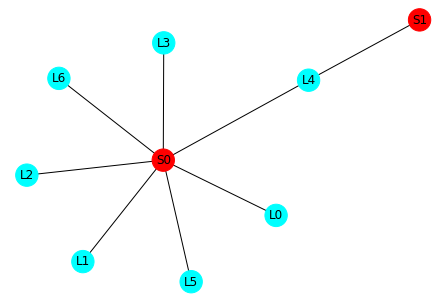

In [81]:
nviz.plot_soma_limb_concept_network(pre_split_neuron)

In [82]:
#3) Calculated the split results
import proofreading_utils as pru
neuron_obj = pre_split_neuron
split_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)

# 4) Get the number of splits required for this neuron
n_paths_cut = pru.get_n_paths_cut(split_results)

if verbose:
    print(f"n_paths_cut = {n_paths_cut}")


# 5) Split the neuron into a list of neuron objects
(neuron_list,
neuron_list_errored_limbs_area,
 neuron_list_errored_limbs_skeletal_length,
neuron_list_n_multi_soma_errors,
neuron_list_n_same_soma_errors) = pru.split_neuron(neuron_obj,
                limb_results=split_results,
                               verbose=verbose,
                                return_error_info=True
                                    )

n_paths_cut = 1
using precomputed split suggestions


---Working on Splitting Limb 4 with 3 components----


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1398920.  499653.  833896.]---------
Starting_edge inside branches_to_conept = [[1398920.  499653.  833896.]
 [1400640.  500497.  835953.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [0]
printing out current edge:
[[1398920.  499653.  833896.]
 [1400640.  500497.  835953.]]
edge_endpoints_to_process was empty so exiting loop after 15 iterations
starting_node in concept map (that should match the starting edge) = 0
Total time for branches to concept conversion = 0.10135102272033691

Done generating concept network 




----Working on seperate_graph 1----
There was no starting information so doing to put dummy information and random starting endpoint = [1406330.5174637   460841.06520872  847093.8040529 ]


---------Working on soma

In [84]:
neuron_obj_s = neuron_list[0]
nviz.visualize_neuron(neuron_obj_s,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [85]:
neuron_obj_s.save_compressed_neuron("./",
                                   export_mesh=False)

Saving Neuorn in suppress_output mode...please wait
Saved File at location: 864691136664412413_0_25_soma_0_split


In [86]:
neuron_obj_s_rec = nru.decompress_neuron("864691136664412413_0_25_soma_0_split",
                                        original_mesh=du.fetch_segment_id_mesh(864691136664412413))
nviz.visualize_neuron(neuron_obj_s_rec,
                     limb_branch_dict="all")

Decompressing Neuron in minimal output mode...please wait

 Working on visualization type: mesh

 Working on visualization type: skeleton



 Working on visualization type: mesh

 Working on visualization type: skeleton


# c) Doing the Axon Processing

In [ ]:
import axon_utils as au

In [88]:
neuron_obj_s_ax = au.complete_axon_processing(neuron_obj_s,
                                     verbose=True)


Part 1: Axon like branchese 
{'L0': array([ 9, 12, 38, 42]), 'L1': array([ 4, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36]), 'L2': array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), 'L4': array([11])}
Limb L0 soma angle: 33.22 
Limb L1 soma angle: 123.47 
Limb L2 soma angle: 143.58 
Limb L3 soma angle: 96.14 
Limb L4 soma angle: 92.06 
Limb L5 soma angle: 81.68 
Limb L6 soma angle: 164.01 

Part 2: possible_axon_limbs = [1, 2, 3, 4, 5, 6]

Phase 2: Working on Limb L1
nodes_to_eliminate = [7]

Phase 2: Working on Limb L2
nodes_to_eliminate = []

Phase 2: Working on Limb L3
nodes_to_eliminate = [6]

Phase 2: Working on Limb L4
nodes_to_eliminate = [0 1 2 4 6]

Phase 2: Working on Limb L5
nodes_to_eliminate = [2]

Phase 2: Working on Limb L6
nodes_to_eliminate = []

----Working on Limb L1-----
No endpoints were eliminated so don't need

  0%|          | 0/1 [00:00<?, ?it/s]

More than 1 seperated mesh (taking the top one): [<trimesh.Trimesh(vertices.shape=(46066, 3), faces.shape=(91864, 3))>
 <trimesh.Trimesh(vertices.shape=(394, 3), faces.shape=(768, 3))>]
root_curr = [1393364.   505701.   823141.3]
Time for preparing soma vertices and root: 0.00038504600524902344
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.3437154293060303
branches_touching_root = [8, 26, 51]
combining close nodes
combine_threshold = 1300
length of Graph = 12873
After combining close endpoints max(kept_branches_idx) = 76, len(kept_branches_idx) = 73
empty_indices % = 0.0
 conflict_indices % = 0.01939333122457216
AFTER face_lookup_resolved_test
Decomposing first pass: 6.234182119369507
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.1219253540039062e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.8160552978515625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.004918813705444336
sbv[0].reshape(-1,3) = [[1393364.   505701.   823141.3]]
closest_sk_pt_coord BEFORE = [1393346.71583676

In [89]:
nviz.visualize_neuron(neuron_obj_s_ax,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [91]:
neuron_obj_s_ax.save_compressed_neuron("./",
                                   export_mesh=False)

Saving Neuorn in suppress_output mode...please wait
Saved File at location: 864691136664412413_0_25_soma_0_split_axon_v5


In [93]:
neuron_obj_s_ax_rec = nru.decompress_neuron("864691136664412413_0_25_soma_0_split_axon_v5",
                                        original_mesh=du.fetch_segment_id_mesh(864691136664412413))
nviz.visualize_neuron(neuron_obj_s_ax_rec,
                     limb_branch_dict="all")

Decompressing Neuron in minimal output mode...please wait

 Working on visualization type: mesh

 Working on visualization type: skeleton


# D) Doing the Proofreading

In [95]:
minnie.AutoProofreadValidationSegmentMap4() & f"old_segment_id={neuron_obj_s_ax_rec.segment_id}"

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,610615,864691135367284729,0.08,864691136664412413,True,True,partial,2,0,0,0,half soma merge


In [96]:
import validation_utils as vu
import proofreading_utils as pru

In [107]:
(filt_neuron,
 return_synapse_df_revised,
 return_synapse_df_errors,
return_validation_df_revised,
return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj_s_ax_rec,   
                    filter_list = pru.v4_exc_filters(),
                    plot_limb_branch_filter_with_disconnect_effect = False,
                    verbose = True,
                    plot_score=False,
                    nucleus_id = 610615,
                    return_synapse_df_errors=True,
                    return_validation_df_extension = True,                                        
                    split_index=0)


*****Using v4 Filters!!!



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': 75, 'width_diff_perc': 60, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'max_degree_to_resolve_wide': 8, 'match_method': 'best_match', 'kiss_check': True, 'kiss_check_bbox_longest_side_threshold': 450}




 ----- Working on coordinate 0: [1394939.91585558  655937.45908417  779524.11123894]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [40, 51]
short_thick_endnodes_to_remove = [14 21 32 48 52]
winning_downstream = 40,error_downstream = [51 57] 
coordinate [1394939.91585558  65

In [110]:
nviz.visualize_neuron(filt_neuron,
                     limb_branch_dict="all"
                     )


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [111]:
filt_neuron.save_compressed_neuron("./",
                                   export_mesh=False)

Saving Neuorn in suppress_output mode...please wait
Saved File at location: 864691136664412413_0_25_soma_0_split_axon_v5


In [113]:
filt_neuron_rec = nru.decompress_neuron("864691136664412413_0_25_soma_0_split_axon_v5",
                                        original_mesh=du.fetch_segment_id_mesh(864691136664412413))
nviz.visualize_neuron(filt_neuron_rec,
                     limb_branch_dict="all")

Decompressing Neuron in minimal output mode...please wait

 Working on visualization type: mesh

 Working on visualization type: skeleton


In [114]:
minnie.DecompositionAxon() & dict(segment_id=864691135367284729)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,axon_length length (in um) of the classified axon skeleton,run_time the amount of time to run (seconds)


In [116]:
# Deleted these from the DecompositionAxon
[vu.new_to_old_segment_id(k) for k in [864691136227020113, 864691135367284729, 864691135415710906]]

[864691135212632704, 864691136664412413, 864691135945461284]

In [117]:
minnie.DecompositionAxon() & dict(segment_id=864691136664412413)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,axon_length length (in um) of the classified axon skeleton,run_time the amount of time to run (seconds)
864691136664412413,0,0.25,30.00,3,0,0,5,=BLOB=,1286.2468253216814,439.79
864691136664412413,0,0.25,30.00,3,0,1,5,=BLOB=,0.0,1.5


In [118]:
neuron_objs,split_indexes = du.decomposition_with_spine_recalculation(864691136664412413)

**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 2


In [122]:
nviz.visualize_neuron(neuron_objs[0],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton
